In [73]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [75]:
df= pd.read_csv(r"C:\Users\Monikesh Kakoty\Desktop\Data Science\kaggle\train.csv\train.csv")

In [76]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [77]:
df.isna().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

Maincateg Null Values

In [78]:
df['maincateg'].unique()

array(['Women', 'Men', nan], dtype=object)

In [79]:
df[df['maincateg'].isnull()].tail()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
15536,20013,Slides,4.5,NaN,Flipkart,499,799,37.55%,NaN,1.0,23.0,NaN,1.0,1,2,0
15570,9968,Women Multicolor Bellies Sandal,3.7,NaN,Flipkart,501,999,49.85%,NaN,NaN,NaN,141.0,111.0,75,128,1
15583,11224,Jutis For Men (Black),3.7,NaN,Flipkart,494,499,1.00%,NaN,NaN,22.0,NaN,4.0,4,8,0
15674,7209,Zod Runner V3 Wn s IDP Running Shoes For Women...,4.3,NaN,Flipkart,1699,3999,57.51%,NaN,NaN,NaN,NaN,268.0,102,140,1
15709,14826,Enzo Beta Wn's Basketball Shoes For Women (Br...,3.9,NaN,Flipkart,1701,5499,69.07%,NaN,NaN,NaN,NaN,6.0,2,10,1


If maincateg is not given we can still figure out Men/Women from titl

In [80]:
df.loc[df['title'].str.upper().str.contains('WOMEN') & df['maincateg'].isnull(), 'maincateg'] = 'Women'
df.loc[df['title'].str.upper().str.contains('MEN') & df['maincateg'].isnull(), 'maincateg'] = 'Men'
df['maincateg'].isnull().sum()

57

In [81]:
df[df['maincateg'].isnull()]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
91,4262,Slippers,3.6,NaN,Flipkart,213,249,14.46%,NaN,NaN,NaN,NaN,466.0,281,476,1
228,18304,Slippers,3.8,NaN,Flipkart,141,499,71.74%,NaN,23.0,71.0,NaN,22.0,14,17,0
728,6801,Slides,3.7,NaN,Flipkart,419,998,58.02%,NaN,4.0,NaN,NaN,NaN,3,4,1
842,19010,Slides,3.9,NaN,Flipkart,2110,2995,29.55%,NaN,1.0,NaN,NaN,0.0,1,1,1
1056,7202,Flip Flops,3.8,NaN,Flipkart,326,499,34.67%,NaN,NaN,NaN,21.0,NaN,2,10,0
1095,9788,Flip Flops,4.2,NaN,Flipkart,1047,1799,41.80%,NaN,7.0,NaN,NaN,5.0,3,2,1
1283,20792,Slippers,4.4,NaN,Flipkart,599,1199,50.04%,NaN,17.0,NaN,NaN,NaN,3,2,1
1288,11000,Slippers,4.3,NaN,Flipkart,599,1199,50.04%,NaN,NaN,NaN,NaN,NaN,3,5,1
1646,12858,Flip Flops,3.4,NaN,Flipkart,498,1497,66.73%,NaN,7.0,NaN,NaN,8.0,8,23,1
2029,2784,Flip Flops,3.6,NaN,Flipkart,99,499,80.16%,NaN,14.0,NaN,NaN,NaN,6,8,0


The remaining of the null values in maincateg are unisexual products like slippers

In [82]:
df.loc[df['maincateg'].isnull(), 'maincateg'] = 'Unisex'
print(df['maincateg'].isnull().sum())
print(df['maincateg'].unique())

0
['Women' 'Men' 'Unisex']


Plotting Data

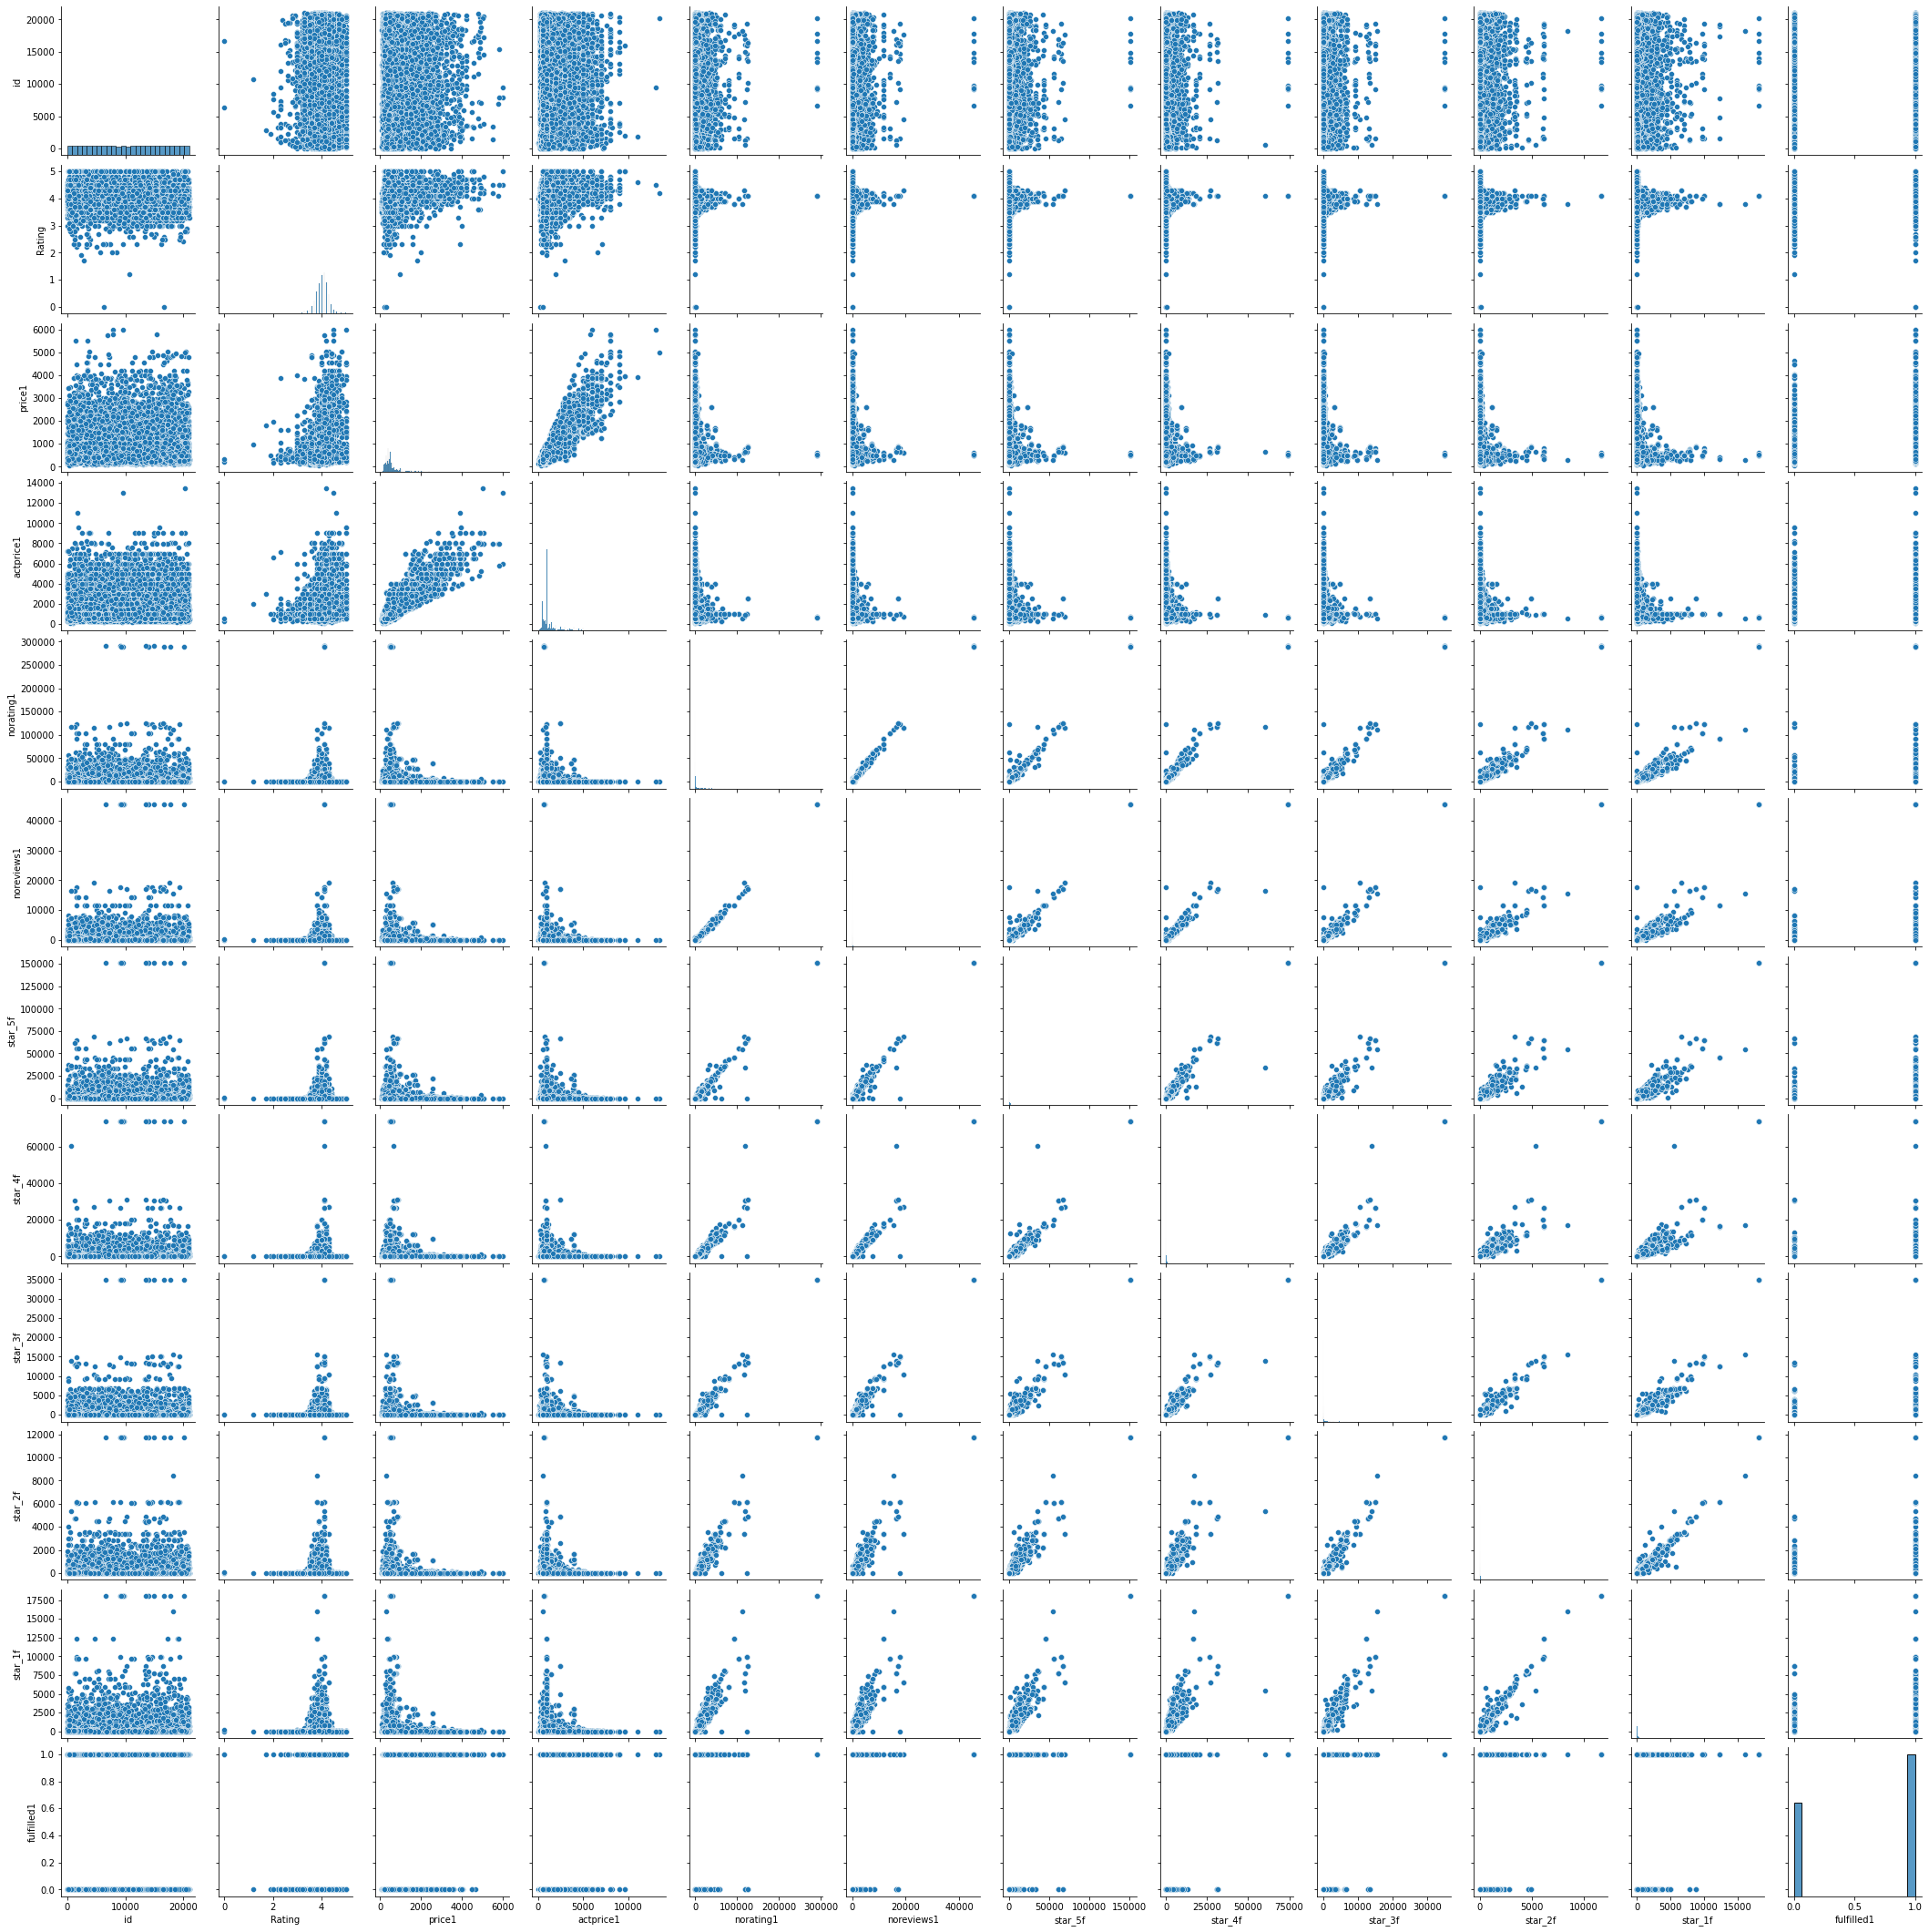

In [83]:
sns.pairplot(df)

#Handling null values

In [84]:
df['star_5f']=df['star_5f'].fillna(df['star_5f'].median())
df['star_4f']=df['star_4f'].fillna(df['star_4f'].median())
df['star_3f']=df['star_3f'].fillna(df['star_3f'].median())

In [85]:
df.loc[df['norating1'].isnull(), 'norating1'] = df.loc[df['norating1'].isnull(), 'star_5f'] + df.loc[df['norating1'].isnull(), 'star_4f'] + df.loc[df['norating1'].isnull(), 'star_3f'] + df.loc[df['norating1'].isnull(), 'star_2f'] + df.loc[df['norating1'].isnull(), 'star_1f']


C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='norating1', ylabel='noreviews1'>

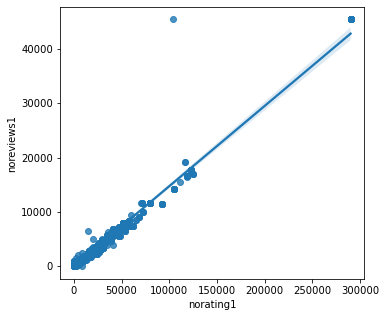

In [86]:

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.regplot(df['norating1'], df['noreviews1'])

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='norating1', ylabel='noreviews1'>

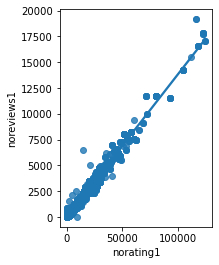

In [87]:

plt.subplot(1,2,2)
sns.regplot(df[df['noreviews1'] < 20000]['norating1'], df[df['noreviews1'] < 20000]['noreviews1'])

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lrm = LinearRegression()
X_lrm = df[df['noreviews1'] < 20000]['norating1'].values.reshape(-1,1)
y_lrm = df[df['noreviews1'] < 20000]['noreviews1'].values
lrm.fit(X_lrm, y_lrm)

df.loc[df['noreviews1'].isnull(), 'noreviews1'] = lrm.predict(df[df['noreviews1'].isnull()]['norating1'].values.reshape(-1,1))

In [90]:
df.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [91]:
df.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [92]:
df.shape

(15730, 16)

In [93]:
df.rename(columns = {'Offer %':'Offer'}, inplace = True)

In [94]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [95]:
df.drop(['id','title','Offer'], axis=1, inplace= True)

In [96]:
df.head()

,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


<AxesSubplot:>

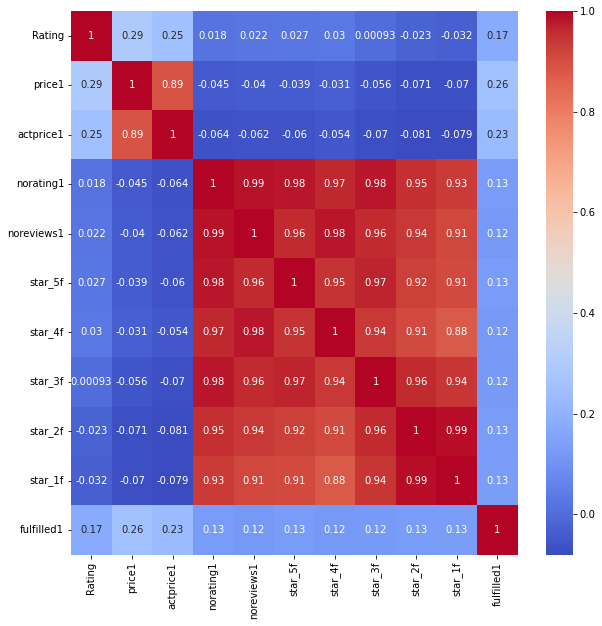

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:>

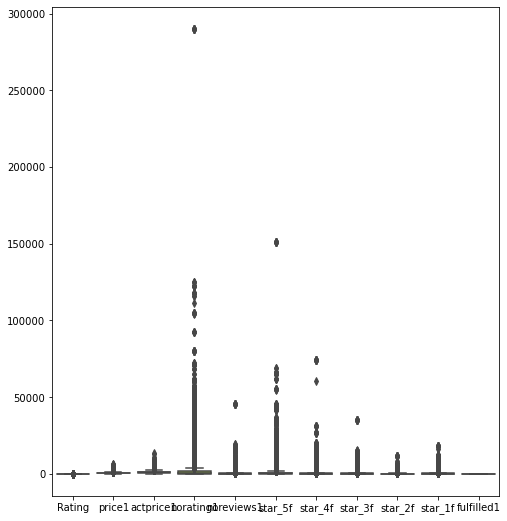

In [98]:
plt.figure(figsize=(8,9))
sns.boxplot( data= df)

<AxesSubplot:>

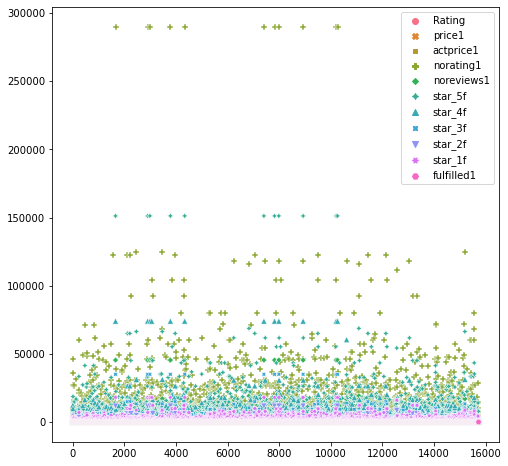

In [99]:
plt.figure(figsize=(8,8))
sns.scatterplot(data= df )

In [100]:
categ= pd.get_dummies(df.maincateg, drop_first= True)
plat= pd.get_dummies(df.platform, drop_first= True)
df1= df.drop(['maincateg', 'platform'], axis=1)

In [101]:
df1= pd.concat([categ, plat, df1], axis=1)

In [102]:
df1.head()

,Unisex,Women,Flipkart,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,0,1,1,3.9,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,0,0,1,3.8,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,0,1,1,4.4,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,0,0,1,4.2,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,0,0,1,3.9,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


In [103]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


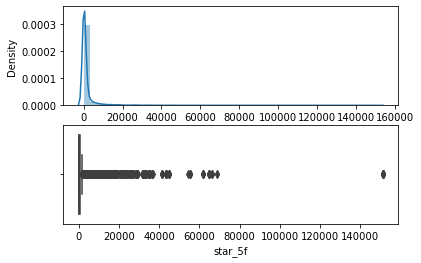

In [104]:
plot(df1,'star_5f')

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


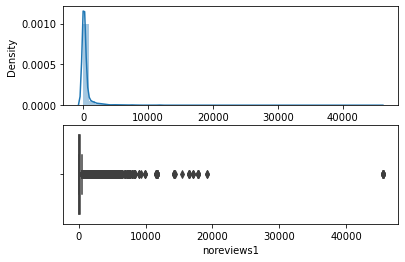

In [105]:
plot(df1,'noreviews1')

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


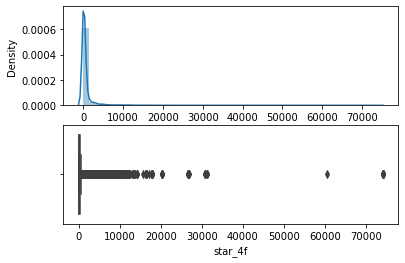

In [106]:
plot(df1,'star_4f')

Model Building

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import plot_tree, plot_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [108]:
X= df1.drop(['price1'], axis=1)
Y= df1['price1']

In [109]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test= train_test_split(X,Y, test_size=0.33, random_state= 42)

In [110]:
X_Train.columns

Index(['Unisex', 'Women', 'Flipkart', 'Rating', 'actprice1', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1'],
      dtype='object')

In [111]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaledTrain=scaler.fit_transform(X_Train)
X_scaledTest=scaler.transform(X_Test)

In [112]:
def model(method):    
    global predictions
    model_name= method
    model_name.fit(X_Train, y_Train)
    predictions= model_name.predict(X_Test)
    mae= mean_absolute_error(y_Test, predictions)
    score = model_name.score(X_Test,y_Test)
    return(print(zip('The MAE for the method', method, 'is = ', mae),('The R2 score', method, 'is = ',score)))
    

In [113]:
def model(method):   
    global predictions
    model_name= method
    model_name.fit(X_Train, y_Train)
    predictions= model_name.predict(X_Test)
    mae= mean_absolute_error(y_Test, predictions)
    score = model_name.score(X_Test,y_Test)
    return(print('The MAE for the method', method, 'is = ', mae),print('The R2 score', method, 'is = ',score))

In [114]:
model(RandomForestRegressor())
model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(XGBRegressor())
model(AdaBoostRegressor())
model(ExtraTreesRegressor())

The MAE for the method RandomForestRegressor() is =  103.47239728870983
The R2 score RandomForestRegressor() is =  0.8848845816579294
The MAE for the method LinearRegression() is =  182.5539346907227
The R2 score LinearRegression() is =  0.7994791555724019
The MAE for the method KNeighborsRegressor() is =  150.33550375650165
The R2 score KNeighborsRegressor() is =  0.8199158082747949
The MAE for the method DecisionTreeRegressor() is =  114.41479323347941
The R2 score DecisionTreeRegressor() is =  0.8132626048811109
The MAE for the method XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_dept

(None, None)

In [115]:
estimator = ExtraTreesRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30,40,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=10)
grid.fit(X_Train, y_Train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8, 10, 12],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [116]:
print(grid.best_estimator_, grid.best_params_, grid.best_score_)

ExtraTreesRegressor(max_features='sqrt', n_estimators=50) {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50} 0.9007049970383584


In [117]:
best_grid= grid.best_estimator_
P_final= best_grid.predict(X_Test)

In [118]:
mae= mean_absolute_error(y_Test, P_final)
print(mae)

91.01727646751245


In [119]:
#importing test data

In [120]:
dftest= pd.read_csv(r"C:\Users\Monikesh Kakoty\Desktop\Data Science\kaggle\train.csv\test.csv")
dftest.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [121]:
dftest.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [122]:
dftest['maincateg'].unique()

array(['Men', 'Women', nan], dtype=object)

In [123]:
dftest[dftest['maincateg'].isnull()].tail()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
5018,16354,Slip On For Women (Black),NaN,NaN,Flipkart,499,163,17,NaN,38,29,8,NaN,0
5047,14342,Dancing Shoes For Men (Red),NaN,NaN,Flipkart,699,3146,417,1750.0,467,321,176,432.0,0
5151,18038,New Trending Sports Shoes Running Shoes For Me...,NaN,NaN,Flipkart,499,3712,449,2098.0,566,415,214,NaN,0
5164,9552,Mojaris Jutis For Men (Black),NaN,NaN,Flipkart,499,11,2,8.0,0,0,1,NaN,0
5177,16621,Women Black Flats Sandal,NaN,NaN,Flipkart,599,1057,94,NaN,229,172,79,NaN,1


In [124]:
dftest.loc[dftest['title'].str.upper().str.contains('WOMEN') & dftest['maincateg'].isnull(), 'maincateg'] = 'Women'
dftest.loc[dftest['title'].str.upper().str.contains('MEN') & dftest['maincateg'].isnull(), 'maincateg'] = 'Men'
dftest['maincateg'].isnull().sum()

7

In [125]:
dftest[dftest['maincateg'].isnull()]

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
88,15449,Flip Flops,NaN,NaN,Flipkart,499,3073,401,1248.0,517,510,274,NaN,1
261,7654,Slides,NaN,NaN,Flipkart,999,1314,155,660.0,228,172,89,NaN,1
265,12240,Wink Duo GU2 IDP Flip Flops,NaN,NaN,Flipkart,1499,1034,102,NaN,250,99,50,99.0,1
627,8089,Slides,3.9,NaN,Flipkart,799,596,98,278.0,142,70,31,NaN,1
2320,9001,Flip Flops,NaN,NaN,Flipkart,499,646,88,293.0,123,90,52,NaN,0
2830,7981,Flip Flops,NaN,NaN,Flipkart,999,2039,238,764.0,307,276,220,NaN,0
3577,4905,Slippers,4.5,NaN,Flipkart,1199,122,24,83.0,25,8,3,NaN,1


In [126]:
dftest.loc[dftest['maincateg'].isnull(), 'maincateg'] = 'Unisex'
print(dftest['maincateg'].isnull().sum())
print(dftest['maincateg'].unique())

0
['Men' 'Women' 'Unisex']


In [127]:
ID= dftest.id

In [128]:
dftest['star_5f']=dftest['star_5f'].fillna(dftest['star_5f'].median())
dftest['Rating']=dftest['Rating'].fillna(dftest['Rating'].median())
dftest['star_1f']=dftest['star_1f'].fillna(dftest['star_1f'].median())

In [129]:
dftest.drop(['id','title'], axis=1, inplace= True)

In [130]:
categ= pd.get_dummies(dftest.maincateg, drop_first= True)
plat= pd.get_dummies(dftest.platform, drop_first= True)
dftest.drop(['maincateg', 'platform',], axis=1 , inplace=True)

In [131]:
dftest.shape

(5244, 10)

In [132]:
df_test= pd.concat([categ, plat, dftest], axis=1)

In [133]:
df_test.head()

,Unisex,Women,Flipkart,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,0,0,1,3.8,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,0,1,1,3.9,499,3015,404,1458.0,657,397,182,321.0,1
2,0,1,1,3.9,999,449,52,229.0,70,71,33,46.0,1
3,0,0,1,3.9,2999,290,40,141.0,51,49,17,32.0,1
4,0,0,1,3.9,999,2423,326,1265.0,414,293,143,308.0,0


In [134]:
Y_Output= pd.DataFrame(best_grid.predict(df_test))
Y_Output.columns=['final_price']

In [135]:
Price1 =(Y_Output.final_price)

In [136]:
Predictions = pd.concat([ID,Price1], axis=1)
Predictions.columns=['ID', 'price1']

In [137]:
Predictions

,ID,price1
0,2242,431.000000
1,20532,284.000000
2,10648,499.000000
3,20677,1270.460000
4,12593,404.880000
...,...,...
5239,14033,462.400000
5240,297,715.700000
5241,18733,391.466667
5242,6162,189.000000


In [138]:
Predictions.to_csv("submissionfinal.csv", index=False)